# Experiment 2: Text Classification

## Librairies

In [9]:
import numpy as np
import torch
import pylab as pl
import pandas as pd
from keras.datasets import imdb
from src.ModelTextClassification import Net

## Data

### IMDB Dataset

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

X_train = torch.from_numpy(vectorize_sequences(train_data)).to(torch.float32)
X_test = torch.from_numpy(vectorize_sequences(test_data)).to(torch.float32)

y_train = torch.from_numpy(np.asarray(train_labels).astype('float32'))
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = torch.from_numpy(np.asarray(test_labels).astype('float32'))
y_test = y_test.reshape(y_test.shape[0], 1)

## Model : Multi-Layer Perceptron

In [11]:
list_algo = ['SGD', 'MOM', 'NAG', 'ADG', 'RMS', 'ADAM', 'AMS', 'NADAM', 'ADAMAX', 'NOSTA']

## Performances of the Optimization Algorithms : IMDB Dataset

In [37]:
# Some definitions
binary_cross_entropy = torch.nn.BCELoss()

nb_epochs = 50
batch_size = 120
batches_per_epoch = 100

alpha = 0.05
beta = 0.9
epsilon = 1e-8

gamma = 0.9999 # RMS Prop

rho = 0.95 # AdaDelta

alpha3 = 0.05 # RMS Prop

beta1 = 0.999   # Adam
beta2 = 0.999 # Adam
alpha1 = 0.001

alpha2 = 0.001 # AMSGrad

### Stochastic Gradient Descent (SGD)

In [38]:
model_ConvNN = Net()
L_sgd, A_sgd, lt_sgd, at_sgd = model_ConvNN.training_SGD(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, verbose=True)
n = np.argmax(at_sgd)
lt_sgd, at_sgd = lt_sgd[n].detach().item(), at_sgd[n].detach().item()

Launching SGD training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.6805448532104492
Epoch 11 / 50 : Loss = 0.38914617896080017
Epoch 21 / 50 : Loss = 0.16208913922309875
Epoch 31 / 50 : Loss = 0.12681777775287628
Epoch 41 / 50 : Loss = 0.096324123442173
Loss test = 0.4136596620082855, Accuracy test = 0.8715599775314331


### Momentum (MOM)

In [14]:
model_ConvNN = Net()
L_mom, A_mom, lt_mom, at_mom = model_ConvNN.training_Mom(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(at_mom)
lt_mom, at_mom = lt_mom[n].detach().item(), at_mom[n].detach().item()

Launching Momentum training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.3236422836780548
Epoch 11 / 50 : Loss = 0.11706764996051788
Epoch 21 / 50 : Loss = 0.04637078195810318
Epoch 31 / 50 : Loss = 0.026787497103214264
Epoch 41 / 50 : Loss = 0.011587248183786869
Loss test = 1.7528018951416016, Accuracy test = 0.8565599918365479


### Nesterov Accelerated Gradient (NAG)

In [15]:
model_ConvNN = Net()
L_nag, A_nag, lt_nag, at_nag = model_ConvNN.training_NAG(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, beta, verbose=True)
n = np.argmax(at_nag)
lt_nag, at_nag = lt_nag[n].detach().item(), at_nag[n].detach().item()

Launching NAG training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.3415135145187378
Epoch 11 / 50 : Loss = 0.10575047135353088
Epoch 21 / 50 : Loss = 0.038024842739105225
Epoch 31 / 50 : Loss = 0.012563582509756088
Epoch 41 / 50 : Loss = 0.009322134777903557
Loss test = 1.4393489360809326, Accuracy test = 0.8601599931716919


### AdaGrad

In [16]:
model_ConvNN = Net()
L_adg, A_adg, lt_adg, at_adg = model_ConvNN.training_ADG(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha, epsilon, verbose=True)
n = np.argmax(at_adg)
lt_adg, at_adg = lt_adg[n].detach().item(), at_adg[n].detach().item()

Launching Ada Grad training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.3810614347457886
Epoch 11 / 50 : Loss = 0.1523008495569229
Epoch 21 / 50 : Loss = 0.07790196686983109
Epoch 31 / 50 : Loss = 0.04199083149433136
Epoch 41 / 50 : Loss = 0.05107440799474716
Loss test = 0.7560288906097412, Accuracy test = 0.8640000224113464


### RMS Prop

In [17]:
model_ConvNN = Net()
L_rms, A_rms, lt_rms, at_rms = model_ConvNN.training_RMS(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha3, gamma, epsilon, verbose=True)
n = np.argmax(at_rms)
lt_rms, at_rms = lt_rms[n].detach().item(), at_rms[n].detach().item()

Launching RMS Prop training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.6871298551559448
Epoch 11 / 50 : Loss = 0.22295641899108887
Epoch 21 / 50 : Loss = 0.2888634204864502
Epoch 31 / 50 : Loss = 0.12015145272016525
Epoch 41 / 50 : Loss = 0.10985372960567474
Loss test = 0.4099096953868866, Accuracy test = 0.8734400272369385


### Adam

In [18]:
model_ConvNN = Net()
L_adam, A_adam, lt_adam, at_adam = model_ConvNN.training_ADAM(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, alpha1, beta1, beta2, epsilon, verbose=True)
n = np.argmax(at_adam)
lt_adam, at_adam = lt_adam[n].detach().item(), at_adam[n].detach().item()

Launching Adam training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.26438620686531067
Epoch 11 / 50 : Loss = 0.11197320371866226
Epoch 21 / 50 : Loss = 0.031757596880197525
Epoch 31 / 50 : Loss = 0.006201071664690971
Epoch 41 / 50 : Loss = 0.0016545600956305861
Loss test = 5.942052364349365, Accuracy test = 0.8542400002479553


### AMS Grad

In [19]:
model_ConvNN = Net()
L_ams, A_ams, lt_ams, at_ams = model_ConvNN.training_AMS(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.002, beta1, beta2, epsilon, verbose=True)
n = np.argmax(at_ams)
lt_ams, at_ams = lt_ams[n].detach().item(), at_ams[n].detach().item()

Launching AMS Grad training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.5920664668083191
Epoch 11 / 50 : Loss = 0.1526171714067459
Epoch 21 / 50 : Loss = 0.07856429368257523
Epoch 31 / 50 : Loss = 0.043242137879133224
Epoch 41 / 50 : Loss = 0.014199391938745975
Loss test = 2.6242494583129883, Accuracy test = 0.84579998254776


### Nadam

In [20]:
model_ConvNN = Net()
L_nadam, A_nadam, lt_nadam, at_nadam = model_ConvNN.training_NADAM(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.002, 0.99, 0.999, epsilon, verbose=True)
n = np.argmax(at_nadam)
lt_nadam, at_nadam = lt_nadam[n].detach().item(), at_nadam[n].detach().item()

Launching Nadam training of model
Number of parameters : 160305


Epoch 1 / 50 : Loss = 0.2761264145374298
Epoch 11 / 50 : Loss = 0.05681392550468445
Epoch 21 / 50 : Loss = 0.008747740648686886
Epoch 31 / 50 : Loss = 0.001389902550727129
Epoch 41 / 50 : Loss = 0.00024052365915849805
Loss test = 2.2153193950653076, Accuracy test = 0.8566799759864807


### Adamax

In [41]:
model_ConvNN = Net()
L_adamax, A_adamax, lt_adamax, at_adamax = model_ConvNN.training_ADAMAX(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)
n = np.argmax(at_adamax)
lt_adamax, at_adamax = lt_adamax[n].detach().item(), at_adamax[n].detach().item()

Launching Adamax training of model
Number of parameters : 160305
Epoch 1 / 50 : Loss = 0.2479436695575714
Epoch 11 / 50 : Loss = 0.09401095658540726
Epoch 21 / 50 : Loss = 0.04740932956337929
Epoch 31 / 50 : Loss = 0.0181089099496603
Epoch 41 / 50 : Loss = 0.006242215633392334
Loss test = 1.475278615951538, Accuracy test = 0.8557599782943726


### Nostalgic Adam

In [33]:
model_ConvNN = Net()
L_nos, A_nos, lt_nos, at_nos = model_ConvNN.training_NOS(
    binary_cross_entropy, 
    X_train, y_train, X_test, y_test, 
    nb_epochs, batch_size, batches_per_epoch, 0.005, 0.9, 1e-4, epsilon, verbose=True)
n = np.argmax(at_nos)
lt_nos, at_nos = lt_nos[n].detach().item(), at_nos[n].detach().item()

Launching Nostalgic Adam training of model
Number of parameters : 160305
Epoch 11 / 50 : Loss = 0.09082318097352982
Epoch 21 / 50 : Loss = 0.03950776532292366
Epoch 31 / 50 : Loss = 0.019549382850527763
Epoch 41 / 50 : Loss = 0.005575922317802906
Epoch 51 / 50 : Loss = 0.002181984018534422
Loss test = 0.9443429112434387, Accuracy test = 0.860040009021759


## Plot Training 

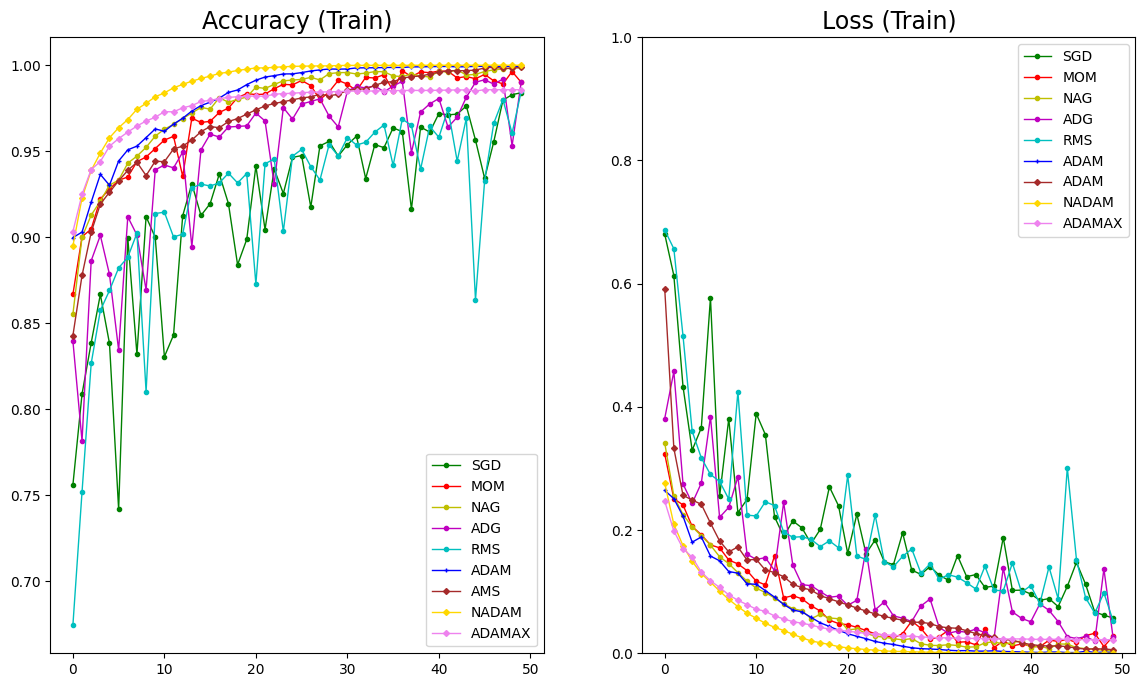

In [39]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(A_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,1)
ax[1].legend()

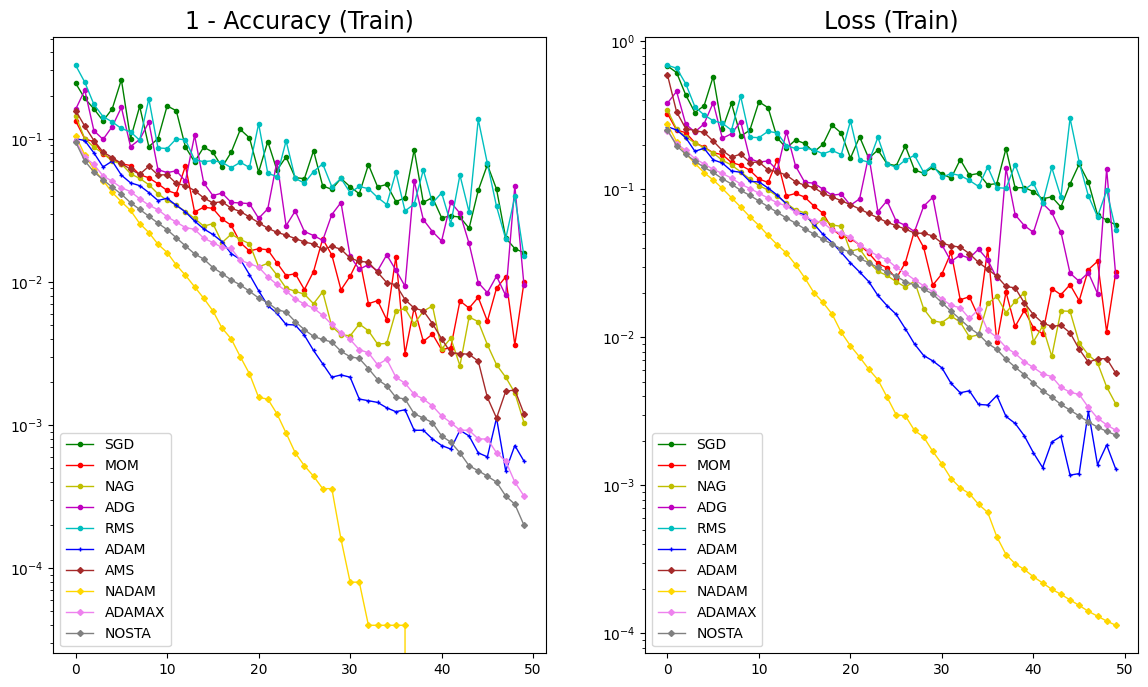

In [42]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(1-np.array(A_nos), marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("1 - Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot(L_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot(L_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot(L_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot(L_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot(L_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot(L_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_ams, marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot(L_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot(L_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].plot(L_nos, marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

In [43]:
list_test_loss = [lt_sgd, lt_mom, lt_nag, lt_adg, lt_rms, lt_adam, lt_ams, lt_nadam, lt_adamax, lt_nos]
list_test_accu = [at_sgd, at_mom, at_nag, at_adg, at_rms, at_adam, at_ams, at_nadam, at_adamax, at_nos]
dico = {'Name':list_algo, 'Loss':list_test_loss, 'Accuracy':list_test_accu}
df_mnist = pd.DataFrame(dico)
df_mnist

,Name,Loss,Accuracy
0,SGD,0.290162,0.88136
1,MOM,0.297365,0.87688
2,NAG,0.344889,0.87188
3,ADG,0.295658,0.88004
4,RMS,0.296404,0.88228
5,ADAM,0.404264,0.87188
6,AMS,0.360922,0.88672
7,NADAM,0.338802,0.87364
8,ADAMAX,0.329790,0.87632
9,NOSTA,0.322461,0.87744
